In [5]:
## Plot the MOTIFBREAKR result for specific SNPs

# Libraries

In [6]:
source('MS0_Libraries.r')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"incomplete final line found by readTableHeader on '../conda_environment/Environment_Configs.csv'"


[1] "/home/icb/corinna.losert/miniconda3/envs/scgrn_R_4_1//lib/R/library"


In [7]:
source('MS4_Plot_Config.r')

In [8]:
source('MS1_Functions.r')

# Generate Plots

In [34]:
## Generate motifBreakR result

In [35]:
### select a SNP, eGene, coeGene

In [36]:
egene = 'CD164'
coegene = 'LEF1'

In [37]:
snp = '6:109380015:T:C'

In [38]:
## Run motifbreakr for snp

In [39]:
# Split the SNP ID to get individual components
snp_info <- strsplit(snp, ":")[[1]]
chromosome <- snp_info[1]
position <- as.numeric(snp_info[2])
ref <- snp_info[3]
alt <- snp_info[4]

# Create a GRanges object
gr <- GRanges(
  seqnames = c(paste0('chr', Rle(chromosome))),
  ranges = c( IRanges(start = position, end = position + nchar(ref) -1 )),
  strand = c( "*"),  # SNPs are usually unstranded
  SNP_id = c(paste0('chr', snp)),
  REF =  DNAStringSet(ref),
  ALT =  DNAStringSet(alt)
)

# Specify the genome build (e.g., hg19 or hg38)
genome(gr) <- "hg38"
attr(gr, "genome.package") = "BSgenome.Hsapiens.UCSC.hg38"

# Get the break result
breakr_result = motifbreakR(snpList = gr, filterp = TRUE, threshold = 1e-2,  # defines whether to filter by p-value instead of pct score
                   pwmList = subset(MotifDb, 
                                    dataSource %in% c("HOCOMOCOv11-core-A","hPDI", "jolma2013" , "stamlab","SwissRegulon", "JASPAR_CORE",'JASPAR_2014','jaspar2016', "jaspar2018" , 'cisbp_1.02', 'HOMER', 'HOCOMOCOv10' ))
                           # , threshold = 1e-4 potential p-value threshoold
                           )

In [40]:
breakr_result

GRanges object with 1333 ranges and 19 metadata columns:
         seqnames    ranges strand |             SNP_id            REF
            <Rle> <IRanges>  <Rle> |        <character> <DNAStringSet>
     [1]     chr6 109380015      + | chr6:109380015:T:C              T
     [2]     chr6 109380015      - | chr6:109380015:T:C              T
     [3]     chr6 109380015      + | chr6:109380015:T:C              T
     [4]     chr6 109380015      + | chr6:109380015:T:C              T
     [5]     chr6 109380015      - | chr6:109380015:T:C              T
     ...      ...       ...    ... .                ...            ...
  [1329]     chr6 109380015      - | chr6:109380015:T:C              T
  [1330]     chr6 109380015      + | chr6:109380015:T:C              T
  [1331]     chr6 109380015      + | chr6:109380015:T:C              T
  [1332]     chr6 109380015      - | chr6:109380015:T:C              T
  [1333]     chr6 109380015      + | chr6:109380015:T:C              T
                    

In [ ]:
### Check whether coeGene is a TF for the SNP in the motifbreakR result

In [43]:
sum(sort(unique(toupper(breakr_result$geneSymbol))) %in% coegene)

[1] 1

In [46]:
### Plot the selected TF

In [47]:
tfs = coegene

In [48]:
subsample_result = breakr_result[toupper(breakr_result$geneSymbol) %in% tfs,]

In [49]:
p_val_data = calculatePvalue(subsample_result)

In [50]:
p_val_data = data.frame(p_val_data )

In [51]:
p_val_data 

seqnames,start,end,width,strand,SNP_id,REF,ALT,varType,motifPos,⋯,seqMatch,pctRef,pctAlt,scoreRef,scoreAlt,Refpvalue,Altpvalue,altPos,alleleDiff,effect
<fct>,<int>,<int>,<int>,<fct>,<chr>,<chr>,<chr>,<chr>,<I<list>>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
chr6,109380015,109380015,1,-,chr6:109380015:T:C,T,C,SNV,"-10, 4",⋯,gaaaaAggctttgatataataccaacact,0.8261969,0.7259863,7.984453,7.044066,4.123803e-05,0.0006546257,1,-0.9403876,strong
chr6,109380015,109380015,1,-,chr6:109380015:T:C,T,C,SNV,"-10, 4",⋯,gaaaaAggctttgatataataccaacact,0.8261969,0.7259863,7.988484,7.047521,4.123803e-05,0.0006546257,1,-0.9409635,strong
chr6,109380015,109380015,1,-,chr6:109380015:T:C,T,C,SNV,"-10, 4",⋯,gaaaaAggctttgatataataccaacact,0.8261969,0.7259863,7.988484,7.047521,4.123803e-05,0.0006546257,1,-0.9409635,strong


In [ ]:
### Save the information about p-values for the example

In [52]:
write.csv(p_val_data, paste0('figures/F14/MotifbreakR_example_p_', egene, '_', coegene, '_', snp, '.csv'))

In [ ]:
### Potentially select only one row of result

In [86]:
#subsample_result = subsample_result[subsample_result$dataSource == 'jaspar2018',]

In [87]:
subsample_result

GRanges object with 3 ranges and 19 metadata columns:
      seqnames    ranges strand |            SNP_id            REF
         <Rle> <IRanges>  <Rle> |       <character> <DNAStringSet>
  [1]    chr12   8992460      - | chr12:8992460:T:C              T
  [2]    chr12   8992460      - | chr12:8992460:T:C              T
  [3]    chr12   8992460      - | chr12:8992460:T:C              T
                 ALT     varType motifPos  geneSymbol  dataSource providerName
      <DNAStringSet> <character>   <list> <character> <character>  <character>
  [1]              C         SNV    -3, 4         Id2  jaspar2016     MA0617.1
  [2]              C         SNV    -3, 4         Id2  cisbp_1.02   M0189_1.02
  [3]              C         SNV    -3, 4         Id2  jaspar2018     MA0617.1
          providerId               seqMatch    pctRef    pctAlt  scoreRef
         <character>            <character> <numeric> <numeric> <numeric>
  [1]       MA0617.1                     ..  0.827732  0.983934   5.

In [88]:
subsample_result = subsample_result[1,]

In [89]:
subsample_result

# result intepretetation:
# pctRef, pctAlt: display the the score for the motif in the sequence as a percentage of the best score that motif could achieve on an ideal sequence


## Scoreing methods:
#The first is the standard summation of log probabilities (method='log'). 
# The second and third are the weighted sum and information content methods (method='default' and method='ic')

# For all three methods, motifBreakR scores and reports the reference and alternate alleles of the sequence 
# (F(sREF,M)nand F(sALT,M) ), and provides the matrix scores psREF and psALT of the SNP (or variant). 
# The scores are scaled as a fraction of scoring range 0-1 of the motif matrix

# invoking filterp=TRUE and setting a threshold at a desired p-value e.g 1e-4, we perform a rough filter on the results by rounding all values in the PWM to two decimal place
# with function calculate PValue actual result can b calculated

## currently the filtering by score doesn't work: gives always no result

GRanges object with 1 range and 19 metadata columns:
      seqnames    ranges strand |            SNP_id            REF
         <Rle> <IRanges>  <Rle> |       <character> <DNAStringSet>
  [1]    chr12   8992460      - | chr12:8992460:T:C              T
                 ALT     varType motifPos  geneSymbol  dataSource providerName
      <DNAStringSet> <character>   <list> <character> <character>  <character>
  [1]              C         SNV    -3, 4         Id2  jaspar2016     MA0617.1
       providerId               seqMatch    pctRef    pctAlt  scoreRef
      <character>            <character> <numeric> <numeric> <numeric>
  [1]    MA0617.1                     ..  0.827732  0.983934   5.33581
       scoreAlt Refpvalue Altpvalue    altPos alleleDiff      effect
      <numeric> <logical> <logical> <integer>  <numeric> <character>
  [1]   6.33381      <NA>      <NA>         1   0.998005      strong
  -------
  seqinfo: 1 sequence from hg38 genome; no seqlengths

Warning message in value[[3L]](cond):
"There doesn't seem to be any cytoband data available for genome 'hg38' at UCSC or the service is temporarily down. Trying to fetch the chromosome length data."


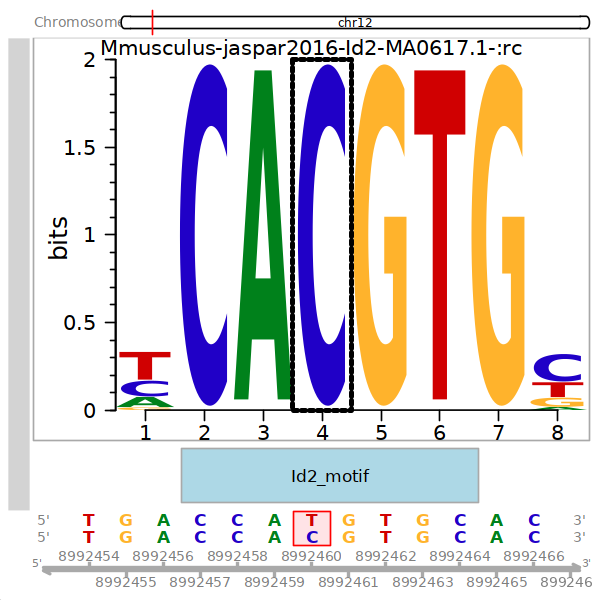

In [91]:
options(repr.plot.width=5, repr.plot.height=5)
plotMB_test(subsample_result, rsid = paste0('chr', snp), effect = 'strong')


In [92]:

pdf(paste0('figures/F14/F14_BREAKR_Example_', egene, '_', coegene, '_', str_replace_all(snp, ':', '_'), '.pdf'), width =5, height =5)
plotMB_test(subsample_result, rsid = paste0('chr', snp), effect = 'strong')
dev.off()

Warning message in value[[3L]](cond):
"There doesn't seem to be any cytoband data available for genome 'hg38' at UCSC or the service is temporarily down. Trying to fetch the chromosome length data."


pdf 
  2